<a href="https://colab.research.google.com/github/jcterrero02/CoderHouse/blob/main/Proyecto_Predicci%C3%B3n_MVP_MLB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Importamos los datos estadisticos desde el 2015 (Disponibilidad en baseballsavant.mlb.com)
stats = pd.read_csv(r'/content/stats.csv')

In [ ]:
# Importamos los ganadores de MVP (fuente baseballreference.com)
mvp_winners = pd.read_html(r'https://www.baseball-reference.com/awards/mvp.shtml#mvp')

In [ ]:
mvp_winners = pd.DataFrame(mvp_winners[0])

Realizamos una limpieza y estructuración de los datos de los ganadores del MVP

In [ ]:
mvp_winners.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                Year                 Lg               Name                 Tm   
0             2023.0                 AL      Shohei Ohtani                LAA   
1             2023.0                 NL   Ronald Acuña Jr.                ATL   
2                NaN                NaN                NaN                NaN   
3             2022.0                 AL        Aaron Judge                NYY   
4             2022.0                 NL   Paul Goldschmidt                STL   

  Unnamed: 4_level_0 Batting Stats                                   \
                 WAR            BA    OBP    SLG    HR    RBI    SB   
0                9.9         0.304  0.412  0.654  44.0   95.0  20.0   
1                8.2         0.337  0.416  0.596  41.0  106.0  73.0   
2                NaN           NaN    NaN    NaN   NaN    NaN   NaN   
3               10.5         0.311  0.425  0.686  62.0  131.0  16.0   
4                7.7         0.317  0.404  0.578  35.0  115.0   7.0   

  Pitching Stats                               Unnamed: 17_level_0  
               W    L   SV   ERA     IP     SO              Voting  
0           10.0  5.0  0.0  3.14  132.0  167.0              Voting  
1            NaN  NaN  NaN   NaN    NaN    NaN              Voting  
2            NaN  NaN  NaN   NaN    NaN    NaN                 NaN  
3            NaN  NaN  NaN   NaN    NaN    NaN              Voting  
4            NaN  NaN  NaN   NaN    NaN    NaN              Voting

In [ ]:
mvp_winners.columns = ["year", "lg", "name", "team", "war", "ba", "obp", "slg", "hr", "rbi", "sb", "pitching_w"
, "pitching_l", "pitching_sv", "pitching_era", "pitching_ip", "pitching_k", "voting"]

In [ ]:
mvp_winners.head()

,year,lg,name,team,war,ba,obp,slg,hr,rbi,sb,pitching_w,pitching_l,pitching_sv,pitching_era,pitching_ip,pitching_k,voting
0,2023.0,AL,Shohei Ohtani,LAA,9.9,0.304,0.412,0.654,44.0,95.0,20.0,10.0,5.0,0.0,3.14,132.0,167.0,Voting
1,2023.0,NL,Ronald Acuña Jr.,ATL,8.2,0.337,0.416,0.596,41.0,106.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,Voting
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022.0,AL,Aaron Judge,NYY,10.5,0.311,0.425,0.686,62.0,131.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,Voting
4,2022.0,NL,Paul Goldschmidt,STL,7.7,0.317,0.404,0.578,35.0,115.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Voting


In [ ]:
# 1. Quitamos las filas vacías
mvp_winners = mvp_winners[mvp_winners['year'].isna()==False]

# 2. Convertimos la variable "Year" a numero entero
mvp_winners['Year'] = mvp_winners['year'].astype('int')

# 3. Eliminamos columnas innecesarias
mvp_winners = mvp_winners[['year', 'lg', 'name']]

mvp_winners.head()


,year,lg,name
0,2023.0,AL,Shohei Ohtani
1,2023.0,NL,Ronald Acuña Jr.
3,2022.0,AL,Aaron Judge
4,2022.0,NL,Paul Goldschmidt
6,2021.0,AL,Shohei Ohtani


In [ ]:
mvp_winners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    211 non-null    float64
 1   lg      211 non-null    object 
 2   name    211 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.6+ KB


Verificamos el dataset de las estadisticas

In [ ]:
stats.head()

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Hunter, Torii",116338,2015,39,521,567,125,81,22,0,...,NaN,88.5,10.8,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4
1,"Ortiz, David",120074,2015,39,528,614,144,70,37,0,...,NaN,93.0,15.7,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7
2,"Rodriguez, Alex",121347,2015,39,523,620,131,75,22,1,...,NaN,91.3,12.2,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9
3,"Ramirez, Aramis",133380,2015,37,475,516,117,68,31,1,...,NaN,87.4,15.8,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9
4,"Beltré, Adrian",134181,2015,36,567,619,163,109,32,4,...,NaN,89.5,12.6,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1


Podemos identificar una problematica con el nombre de los jugadores, aparece el apellido delante y más adelante será necesario hacer un ajuste para poder hacer un join

In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1246 non-null   object 
 1   player_id              1246 non-null   int64  
 2   year                   1246 non-null   int64  
 3   player_age             1246 non-null   int64  
 4   ab                     1246 non-null   int64  
 5   pa                     1246 non-null   int64  
 6   hit                    1246 non-null   int64  
 7   single                 1246 non-null   int64  
 8   double                 1246 non-null   int64  
 9   triple                 1246 non-null   int64  
 10  home_run               1246 non-null   int64  
 11  strikeout              1246 non-null   int64  
 12  walk                   1246 non-null   int64  
 13  k_percent              1246 non-null   float64
 14  bb_percent             1246 non-null   float64
 15  batt

In [ ]:
stats['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
# Ajuste a la variable nombre
stats['nombre'] = stats['last_name, first_name'].apply(lambda x: x.split(',')[1]) +' '+ stats['last_name, first_name'].apply(lambda x: x.split(',')[0])
stats['nombre'] = stats['nombre'].str.strip()

# Eliminamos la variable 'last_name, first_name'
stats.drop(columns=['last_name, first_name'], axis=1, inplace=True)

stats.head()

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,nombre
0,116338,2015,39,521,567,125,81,22,0,22,...,88.5,10.8,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4,Torii Hunter
1,120074,2015,39,528,614,144,70,37,0,37,...,93.0,15.7,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7,David Ortiz
2,121347,2015,39,523,620,131,75,22,1,33,...,91.3,12.2,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9,Alex Rodriguez
3,133380,2015,37,475,516,117,68,31,1,17,...,87.4,15.8,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9,Aramis Ramirez
4,134181,2015,36,567,619,163,109,32,4,18,...,89.5,12.6,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1,Adrian Beltré


In [ ]:
# Vamos a ver los ganadores de MVP desde el 2015 para poder asignarles un ID como jugador
mvp_winners[mvp_winners['year']>=2015]

,year,lg,name
0,2023.0,AL,Shohei Ohtani
1,2023.0,NL,Ronald Acuña Jr.
3,2022.0,AL,Aaron Judge
4,2022.0,NL,Paul Goldschmidt
6,2021.0,AL,Shohei Ohtani
7,2021.0,NL,Bryce Harper
9,2020.0,AL,José Abreu
10,2020.0,NL,Freddie Freeman
12,2019.0,AL,Mike Trout
13,2019.0,NL,Cody Bellinger


In [ ]:
# Podemos ver que el nombre posee algunas inconsistencias con respecto al dataset de los ganadores de MVP, debemos corregir esto
stats[stats['nombre'].str.contains('Ronald')
       | stats['nombre'].str.contains('Altuve')
       | stats['nombre'].str.contains('Abreu')
       | stats['nombre'].str.contains('Ohtani')
       | stats['nombre'].str.contains('Freeman')
       | stats['nombre'].str.contains('Trout')
       | stats['nombre'].str.contains('Bellinger')
       | stats['nombre'].str.contains('Betts')
       | stats['nombre'].str.contains('Yelich')
       | stats['nombre'].str.contains('Stanton')
       | stats['nombre'].str.contains('Bryant')
       | stats['nombre'].str.contains('Donaldson')
       | stats['nombre'].str.contains('Harper')
       | stats['nombre'].str.contains('Goldschmidt')
       | stats['nombre'].str.contains('Judge')][['nombre', 'player_id']].drop_duplicates()

,nombre,player_id
82,Paul Goldschmidt,502671
83,Jose Altuve,514888
87,Josh Donaldson,518626
113,Mike Trout,545361
115,Bryce Harper,547180
116,José Abreu,547989
126,Kris Bryant,592178
131,Christian Yelich,592885
137,Mookie Betts,605141
223,Freddie Freeman,518692


In [ ]:
mvp_winners[mvp_winners['year']>=2015]['name'].unique()

array(['Shohei Ohtani', 'Ronald Acuña Jr.', 'Aaron Judge',
       'Paul Goldschmidt', 'Bryce Harper', 'José Abreu',
       'Freddie Freeman', 'Mike Trout', 'Cody Bellinger', 'Mookie Betts',
       'Christian Yelich', 'Jose Altuve', 'Giancarlo Stanton',
       'Kris Bryant', 'Josh Donaldson'], dtype=object)

In [ ]:
# Creacion de una variable ID para el join
mvp_winners['player_id'] = np.where(mvp_winners['name']=='Shohei Ohtani', '660271',
                       np.where(mvp_winners['name']=='Ronald Acuña Jr.', '660670',
                                np.where(mvp_winners['name']=='Aaron Judge', '592450',
                                         np.where(mvp_winners['name']=='Paul Goldschmidt', '502671',
                                                  np.where(mvp_winners['name']=='Bryce Harper', '547180',
                                                           np.where(mvp_winners['name']=='José Abreu', '547989',
                                                                    np.where(mvp_winners['name']=='Freddie Freeman', '518692',
                                                                               np.where(mvp_winners['name']=='Mike Trout', '545361',
                                                                                        np.where(mvp_winners['name']=='Cody Bellinger', '641355',
                                                                                                 np.where(mvp_winners['name']=='Mookie Betts', '605141',
                                                                                                          np.where(mvp_winners['name']=='Christian Yelich', '592885',
                                                                                                                   np.where(mvp_winners['name']=='José Altuve', '514888',
                                                                                                                            np.where(mvp_winners['name']=='Giancarlo Stanton', '519317',
                                                                                                                                     np.where(mvp_winners['name']=='Kris Bryant', '592178',
                                                                                                                                              np.where(mvp_winners['name']=='Josh Donaldson', '518626', 'NO_ID')))))))))))))))


# Creamos un ID
mvp_winners['ID'] = mvp_winners['player_id']+'-'+mvp_winners['year'].astype('int64').astype('str')

mvp_winners.head()

,year,lg,name,player_id,ID
0,2023.0,AL,Shohei Ohtani,660271,660271-2023
1,2023.0,NL,Ronald Acuña Jr.,660670,660670-2023
3,2022.0,AL,Aaron Judge,592450,592450-2022
4,2022.0,NL,Paul Goldschmidt,502671,502671-2022
6,2021.0,AL,Shohei Ohtani,660271,660271-2021


In [ ]:
# Creamos un ID
stats['ID'] = stats['player_id'].astype('str')+'-'+stats['year'].astype('str')

stats.head()

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,nombre,ID
0,116338,2015,39,521,567,125,81,22,0,22,...,10.8,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4,Torii Hunter,116338-2015
1,120074,2015,39,528,614,144,70,37,0,37,...,15.7,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7,David Ortiz,120074-2015
2,121347,2015,39,523,620,131,75,22,1,33,...,12.2,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9,Alex Rodriguez,121347-2015
3,133380,2015,37,475,516,117,68,31,1,17,...,15.8,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9,Aramis Ramirez,133380-2015
4,134181,2015,36,567,619,163,109,32,4,18,...,12.6,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1,Adrian Beltré,134181-2015


In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            1246 non-null   int64  
 1   year                 1246 non-null   int64  
 2   player_age           1246 non-null   int64  
 3   ab                   1246 non-null   int64  
 4   pa                   1246 non-null   int64  
 5   hit                  1246 non-null   int64  
 6   single               1246 non-null   int64  
 7   double               1246 non-null   int64  
 8   triple               1246 non-null   int64  
 9   home_run             1246 non-null   int64  
 10  strikeout            1246 non-null   int64  
 11  walk                 1246 non-null   int64  
 12  k_percent            1246 non-null   float64
 13  bb_percent           1246 non-null   float64
 14  batting_avg          1246 non-null   float64
 15  slg_percent          1246 non-null   f

In [ ]:
stats.drop(columns={'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing', 'squared_up_contact', 'squared_up_swing',
                    'avg_swing_length', 'swords'}, axis=1, inplace=True)

In [ ]:
# Crearemos la columna de MVP Winner para cada año
stats['MVP'] = np.where(stats['ID'].isin(mvp_winners['ID']), 1, 0)

stats.head()

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,nombre,ID,MVP
0,116338,2015,39,521,567,125,81,22,0,22,...,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4,Torii Hunter,116338-2015,0
1,120074,2015,39,528,614,144,70,37,0,37,...,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7,David Ortiz,120074-2015,0
2,121347,2015,39,523,620,131,75,22,1,33,...,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9,Alex Rodriguez,121347-2015,0
3,133380,2015,37,475,516,117,68,31,1,17,...,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9,Aramis Ramirez,133380-2015,0
4,134181,2015,36,567,619,163,109,32,4,18,...,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1,Adrian Beltré,134181-2015,0


In [ ]:
stats[stats['MVP']==1]

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,nombre,ID,MVP
87,518626,2015,29,620,711,184,100,41,2,41,...,31.1,12.2,46.5,103.112725,96.028967,25.3,45.8,Josh Donaldson,518626-2015,1
115,547180,2015,22,521,654,172,91,38,1,42,...,37.1,12.9,47.5,102.728475,95.847158,26.7,44.2,Bryce Harper,547180-2015,1
246,545361,2016,24,549,681,173,107,32,5,29,...,37.6,14.4,40.3,102.379849,95.442651,20.7,38.3,Mike Trout,545361-2016,1
265,592178,2016,24,603,699,176,99,35,3,39,...,36.3,11.7,38.9,100.570830,94.490281,28.1,48.5,Kris Bryant,592178-2016,1
357,519317,2017,27,597,692,168,77,32,0,59,...,31.6,17.4,45.6,105.945187,97.153916,31.8,42.9,Giancarlo Stanton,519317-2017,1
527,592885,2018,26,574,651,187,110,34,7,36,...,36.7,12.9,50.8,103.601266,96.465575,22.8,44.3,Christian Yelich,592885-2018,1
542,605141,2018,25,520,614,180,96,47,5,32,...,39.4,14.1,50.6,101.383522,95.486972,15.5,35.6,Mookie Betts,605141-2018,1
628,545361,2019,27,470,600,137,63,27,2,45,...,43.8,18.9,44.4,103.466774,95.970476,19.2,36.8,Mike Trout,545361-2019,1
685,641355,2019,23,558,661,170,86,34,3,47,...,39.6,12.7,45.9,101.221348,94.966275,23.5,44.6,Cody Bellinger,641355-2019,1
729,518692,2020,30,214,262,73,36,23,1,13,...,49.2,14.7,54.2,101.812650,95.798407,20.1,48.2,Freddie Freeman,518692-2020,1


In [ ]:
stats.columns

Index(['player_id', 'year', 'player_age', 'ab', 'pa', 'hit', 'single',
       'double', 'triple', 'home_run', 'strikeout', 'walk', 'k_percent',
       'bb_percent', 'batting_avg', 'slg_percent', 'on_base_percent',
       'on_base_plus_slg', 'b_rbi', 'r_total_stolen_base', 'r_run', 'xba',
       'xslg', 'woba', 'xwoba', 'xobp', 'xiso', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'whiff_percent', 'swing_percent', 'nombre', 'ID', 'MVP'],
      dtype='object')

In [ ]:
# Reordenamos el dataset de estadisticas
stats_ = stats[['nombre', 'ID', 'MVP','player_id', 'year', 'player_age', 'ab', 'pa', 'hit', 'single',
       'double', 'triple', 'home_run', 'strikeout', 'walk', 'k_percent',
       'bb_percent', 'batting_avg', 'slg_percent', 'on_base_percent',
       'on_base_plus_slg', 'b_rbi', 'r_total_stolen_base', 'r_run', 'xba',
       'xslg', 'woba', 'xwoba', 'xobp', 'xiso',
       'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent',
       'barrel_batted_rate', 'hard_hit_percent', 'avg_best_speed',
       'avg_hyper_speed', 'whiff_percent', 'swing_percent']]

stats_.head()

,nombre,ID,MVP,player_id,year,player_age,ab,pa,hit,single,...,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,Torii Hunter,116338-2015,0,116338,2015,39,521,567,125,81,...,0.142,88.5,10.8,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4
1,David Ortiz,120074-2015,0,120074,2015,39,528,614,144,70,...,0.314,93.0,15.7,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7
2,Alex Rodriguez,121347-2015,0,121347,2015,39,523,620,131,75,...,0.247,91.3,12.2,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9
3,Aramis Ramirez,133380-2015,0,133380,2015,37,475,516,117,68,...,0.164,87.4,15.8,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9
4,Adrian Beltré,134181-2015,0,134181,2015,36,567,619,163,109,...,0.186,89.5,12.6,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1


In [ ]:
stats_['MVP'].value_counts()

MVP
0    1229
1      17
Name: count, dtype: int64

In [ ]:
stats_['year'].value_counts()

year
2016    146
2017    144
2015    142
2020    142
2018    141
2019    135
2023    134
2021    132
2022    130
Name: count, dtype: int64

Se puede evidenciar (y era de esperarse) el desbalanceo de los datos, por ellos haremos un analisis para conocer cuales variables tienen mas correlacion con los ganadores, en base a esto filtraremos para mantener el top 3 de cada año en base a una ingenieria de variables

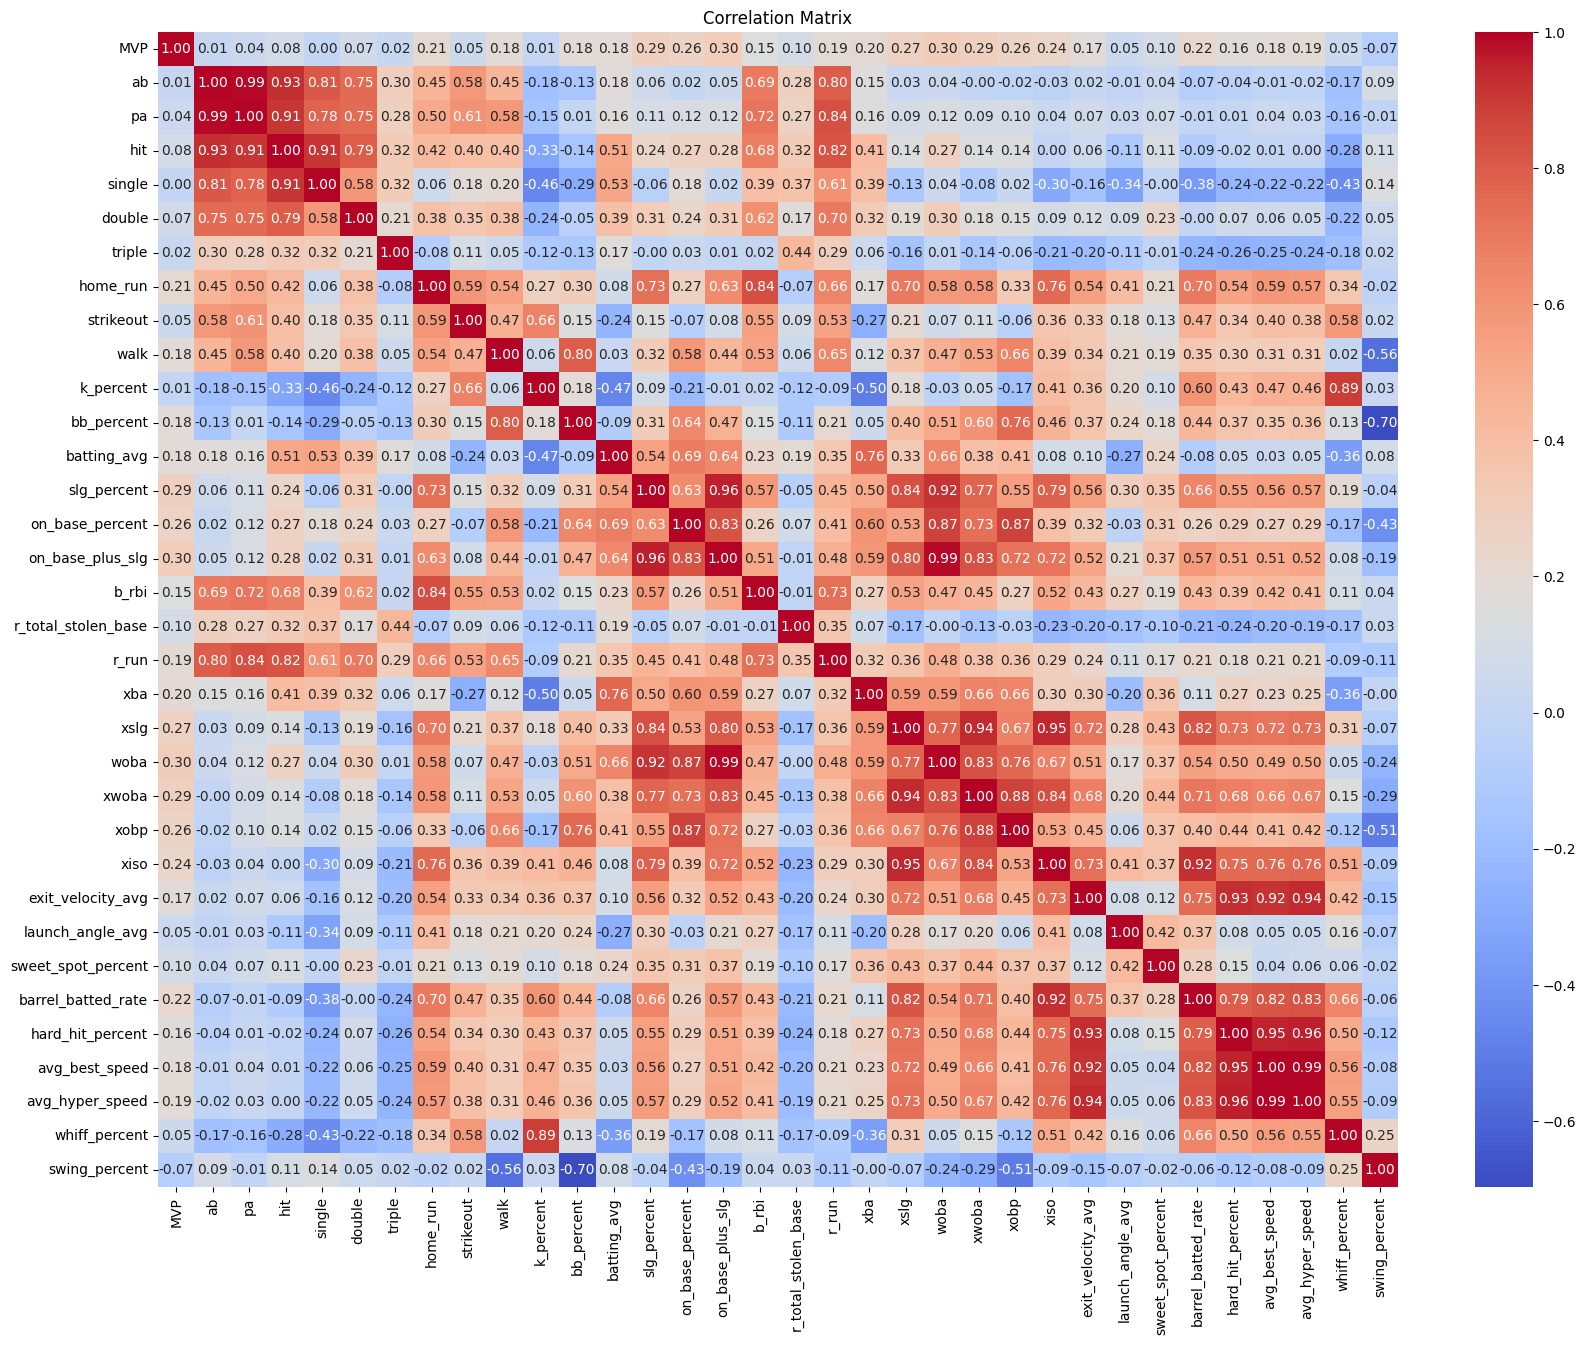

In [ ]:
# Compute the correlation matrix
corr_matrix = stats_.drop(columns=['nombre',	'player_id','year',	'player_age', 'ID'], axis=1).corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: how to use PCA

from sklearn.decomposition import PCA

# Create a PCA instance with 3 principal components
pca = PCA(n_components=3)

# Fit the PCA instance to the scaled data
pca.fit(scaled_data)

# Transform the scaled data using the fitted PCA instance
pca_data = pca.transform(scaled_data)

# Print the shape of the transformed data
print("Shape of the transformed data:", pca_data.shape)


In [ ]:
stats['player_id'] = stats['player_id'].astype('str')

[x for x in stats.drop(columns=['year', 'player_age']).columns if stats[x].dtype in ('int64','float64')]

['MVP', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'batting_avg', 'slg_percent', 'on_base_percent', 'on_base_plus_slg', 'b_rbi', 'r_total_stolen_base', 'r_run']


Analizando el grafico de calor, podemos ver alta relación entre variables predictoras. Esto nos indica que podemos hacer reducción de dimensionalidad o selección de variables.

'on_base_plus_slg' es una estadistica que se ve afectada por casi todas las demas variables. Para el modelo podemos utilizar las siguientes variables:

['ab', 'pa', 'triple', 'k_percent', 'on_base_plus_slg']

In [ ]:
cols = stats[['ab', 'triple', 'k', 'on_base_plus_slg', 'MVP']]

KeyError: "['k_percent'] not in index"

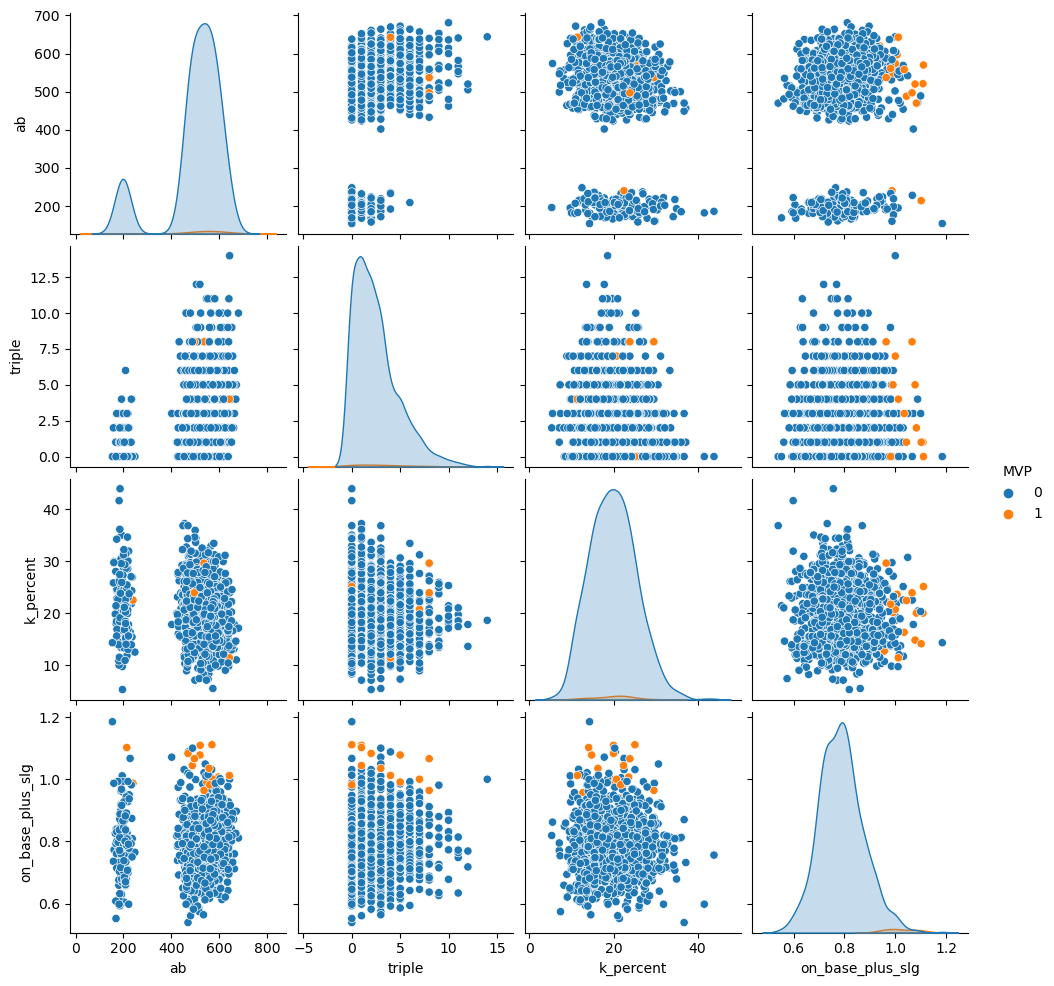

In [ ]:
sns.pairplot(cols, hue='MVP')

In [ ]:
stats_ = stats[['ab', 'triple', 'k_percent', 'on_base_plus_slg', 'MVP']]

stats_.head()

,ab,triple,k_percent,on_base_plus_slg,MVP
0,521,0,18.5,0.702,0
1,528,0,15.5,0.913,0
2,523,1,23.4,0.842,0
3,475,1,13.2,0.720,0
4,567,4,10.5,0.787,0


In [ ]:
# Importamos el paquete para crear el dataset de entrenamiento y prueba
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # balanceo de variable objetivo
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score # evaluate predictions
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
# Separar variables independientes (X) y variable objetivo (y)
X = stats_.drop(['MVP'], axis=1)
y = stats_['MVP']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
Counter(y_train)

Counter({0: 825, 1: 9})

In [ ]:
# Over Sampling con SMOTE
sampler = SMOTE()

# Aplicar SMOTE para generar muestras sintéticas
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_resampled)

In [ ]:
# Inicializar SMOTE para hacer oversampling
over_sampler = SMOTE()
under_sampler = RandomOverSampler()
scaler = MinMaxScaler()
model = LogisticRegression()

pasos = [('Over', over_sampler), ('Under', under_sampler), ('Scaler', scaler), ('Modelo', model)]

pipeline = Pipeline(steps= pasos)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


Mean ROC AUC: 0.984


In [ ]:
predicciones3 = cross_val_predict(pipeline, X, y, cv=cv)

print(classification_report(y_test, predicciones3))

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train_resampled)

X_train = scaler.transform(X_train_resampled)

X_test = scaler.transform(X_test)

In [ ]:
# fit the model
model = LogisticRegression()

model.fit(X_train_resampled, y_train_resampled)

# evaluate the model
predicciones = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predicciones)
print('Accuracy: %.3f' % (accuracy*100))

In [ ]:
print(classification_report(y_test, predicciones))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# fit the model
model2 = DecisionTreeClassifier()

model2.fit(X_train_resampled, y_train_resampled)

# evaluate the model
predicciones2 = model2.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(y_test, predicciones2)
print('Accuracy: %.3f' % (accuracy2*100))

In [ ]:
print(classification_report(y_test, predicciones2))